In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import data_processing as data
import HBA_analysis as hba
import plotting
%matplotlib inline

In [3]:
negraes = data.get_genelist('negraes')
duncan = data.get_genelist('duncan')
watson_coding = data.get_genelist('watson_protein_coding')
lutterAN = data.get_genelist('lutterAN')
lutterBN = data.get_genelist('lutterBN')

In [4]:
adult_exp = data.get_dataset(dataset='adult', probes_strategy='reannotator')
fetal_exp = data.get_dataset(dataset='fetal', probes_strategy='reannotator', 
                             selected_donor_ids=['12566', '12690', '12840', '14751'])

Processed HBA brain dataset found locally. Loading from data/processed/adult_brainarea_vs_genes_exp_reannotator_donors_10021-9861-14380-15697-15496-12876.tsv
Processed HBA brain dataset found locally. Loading from data/processed/fetal_brainarea_vs_genes_exp_reannotator_donors_12566-12690-12840-14751.tsv


# Results with Negraes gene list
## Adult human brain data

In [5]:
results_adult_negraes = hba.generate_stats_table(exp_df=adult_exp, gene_list=negraes)

You submitted a gene list with 360 genes.
    289 of those genes are present in the reference dataset.
    Genes not found in our reference data: ['AC093850.2' 'ACTG1P11' 'ADGRE4P' 'ADGRF5P1' 'ARMC4P1' 'C16orf47'
 'C4orf50' 'CASC16' 'EEF1DP5' 'ERICH5' 'FAM27E4' 'FOXD4L1' 'HCG24' 'HLA-U'
 'HMGN2P30' 'HOXB' 'IMPA1P' 'ITM2BP1' 'KRR1P1' 'KRT8P50' 'LDHAP3' 'LDHAP7'
 'LINC00106' 'LINC00441' 'LINC00565' 'LINC00920' 'LINC00941' 'LINC01123'
 'LINC01252' 'LINC01340' 'LINC01549' 'LMNTD1' 'LMNTD2' 'MICF'
 'MIR4435-2HG' 'MIR4458HG' 'MIR4712' 'MRPS31P2' 'MTND4P24' 'MYO5BP2'
 'NEFHP1' 'OGFRP1' 'OR7E12P' 'PARP4P1' 'PGBD4P3' 'PPIEL' 'PSMD10P1'
 'PSPHP1' 'RN7SKP234' 'RNA5SP195' 'RNA5SP323' 'RNU6-1095P' 'RNU6-125P'
 'RNU6-476P' 'RNU6-703P' 'RP4-747G18.5' 'RPL21P43' 'RPL23AP69' 'RPL39P5'
 'RPSAP53' 'SETP17' 'SLC10A5P1' 'SLC9A7P1' 'SNAI1P1' 'TIMM9P2' 'TPT1P10'
 'TRPC6P' 'TTC6' 'UBE2Q2P6' 'VTRNA1-3' 'ZSWIM5P2']


In [6]:
brain_areas = ['lateral parabrachial nucleus', 'medial parabrachial nucleus',
               'paraventricular nucleus of the hypothalamus', 'arcuate nucleus of the hypothalamus',
               'raphe nuclei of medulla', 'pontine raphe nucleus', 'subcallosal cingulate gyrus', 'nucleus accumbens', 
               'ventral tegmental area', 'bed  nucleus of stria terminalis', 'central nucleus']

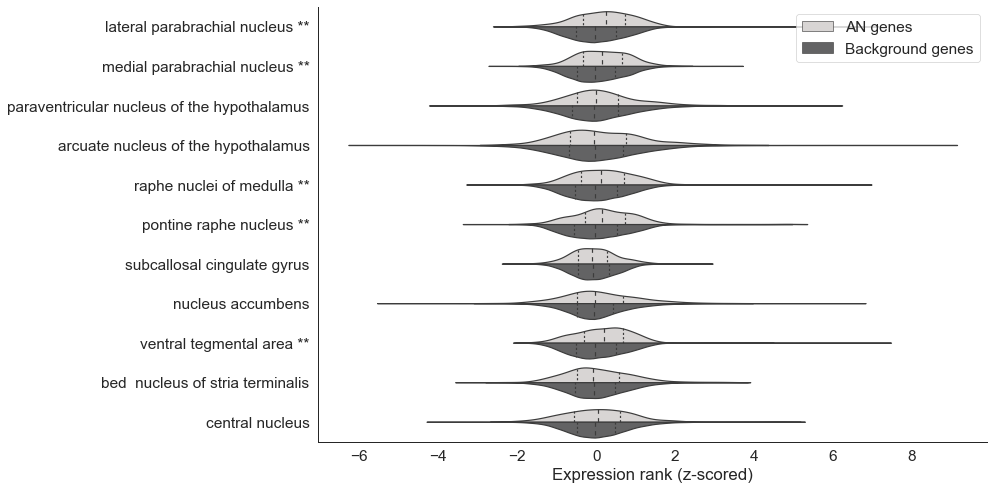

In [7]:
brain_area_labels = ['lateral parabrachial nucleus **', 'medial parabrachial nucleus **',
               'paraventricular nucleus of the hypothalamus', 'arcuate nucleus of the hypothalamus',
               'raphe nuclei of medulla **', 'pontine raphe nucleus **', 'subcallosal cingulate gyrus', 'nucleus accumbens', 
               'ventral tegmental area **', 'bed  nucleus of stria terminalis', 'central nucleus']
sns.set_style("white")
plotting.make_violins(adult_exp, brain_areas, negraes, brain_area_labels, output='adult_negraes_violins.pdf')

In [8]:
results_adult_negraes.loc[brain_areas]

,AUROC,p,pFDR,rank
lateral parabrachial nucleus,0.579242,0.000004,0.000031,1.0
medial parabrachial nucleus,0.570097,0.000041,0.000253,9.0
paraventricular nucleus of the hypothalamus,0.522800,0.182426,0.345142,75.0
arcuate nucleus of the hypothalamus,0.515532,0.363715,0.520171,93.0
raphe nuclei of medulla,0.564662,0.000156,0.000804,15.0
pontine raphe nucleus,0.573857,0.000016,0.000121,2.0
subcallosal cingulate gyrus,0.493245,0.692814,0.781519,137.0
nucleus accumbens,0.522924,0.180057,0.345142,74.0
ventral tegmental area,0.572880,0.000020,0.000147,4.0
bed nucleus of stria terminalis,0.514136,0.408418,0.567384,96.0


## Fetal brain data

In [9]:
# subgenual cingulate and central amygdala have multiple subsamples
subgenual_cingulate_cortex = ['IZ in subgenual (subcallosal) cingulate cortex', 'VZ in subgenual cingulate neocortex',
                              'SZ in subgenual cingulate cortex', 'SP in subgenual (subcallosal) cingulate cortex',
                              'outer CP in subgenual (subcallosal) cingulate cortex',
                              'inner CP in subgenual (subcallosal) cingulate cortex']

central_amygdala = ['central nuclear group',
                    'medial subdivision of central nucleus']

# generate new columns that are aggregates of smaller sampled areas
fetal_exp['subgenual_cingulate_cortex'] = fetal_exp.loc[:, subgenual_cingulate_cortex].mean(axis=1)
fetal_exp['central_amygdala'] = fetal_exp.loc[:, central_amygdala].mean(axis=1)

In [10]:
# slight differences in naming conventions in comparison to adult...
fetal_brain_areas = ['lateral parabrachial nucleus', 'medial parabrachial nucleus',
                     'paraventricular nucleus of hypothalamus', 'arcuate nucleus of hypothalamus',
                     'dorsal raphe nucleus', 'raphe magnus nucleus', 'raphe obscurus nucleus', 'subgenual_cingulate_cortex', 
                     'core of nucleus accumbens', 'ventral tegmental area', 'bed nucleus of stria terminalis', 
                      'central_amygdala', 'solitary nucleus']

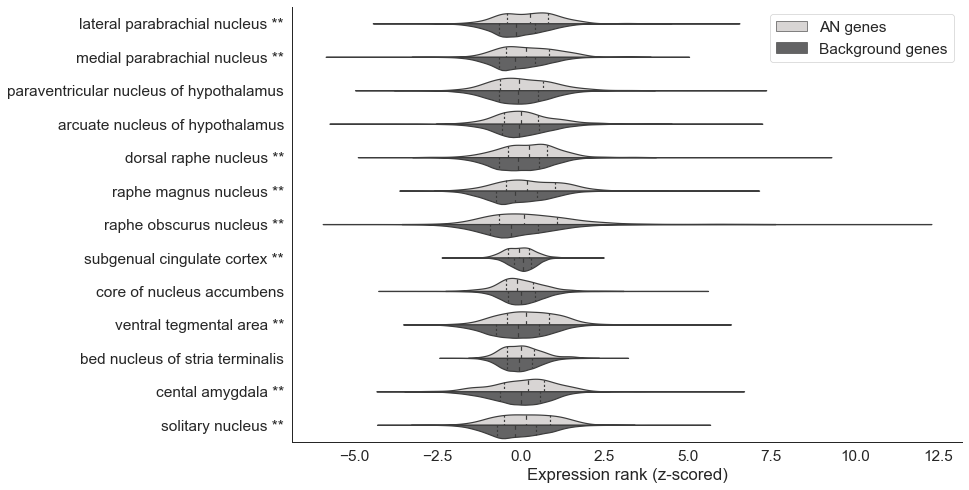

In [11]:
fetal_labels = ['lateral parabrachial nucleus **', 'medial parabrachial nucleus **', 
          'paraventricular nucleus of hypothalamus', 'arcuate nucleus of hypothalamus',
          'dorsal raphe nucleus **', 'raphe magnus nucleus **', 'raphe obscurus nucleus **', 'subgenual cingulate cortex **',
          'core of nucleus accumbens',
          'ventral tegmental area **', 'bed nucleus of stria terminalis', 
          'cental amygdala **', 'solitary nucleus **']

plotting.make_violins(fetal_exp, fetal_brain_areas, negraes, brain_area_labels=fetal_labels, output='fetal_negraes_violins.pdf')


# Results with Watson gene list
## Adult human data

In [12]:
results_adult_watson_protein_coding = hba.generate_stats_table(exp_df=adult_exp, gene_list=watson_coding)

You submitted a gene list with 107 genes.
    105 of those genes are present in the reference dataset.
    Genes not found in our reference data: ['XXcos-LUCA11.5' 'RP11-949J7.8']


In [15]:
results_adult_watson_protein_coding.loc[brain_areas]

,AUROC,p,pFDR,rank
lateral parabrachial nucleus,0.431583,0.015419,0.157477,215.0
medial parabrachial nucleus,0.485963,0.619205,0.816225,168.0
paraventricular nucleus of the hypothalamus,0.528956,0.305265,0.689554,55.0
arcuate nucleus of the hypothalamus,0.603365,0.000252,0.014642,1.0
raphe nuclei of medulla,0.471105,0.306278,0.689554,189.0
pontine raphe nucleus,0.527921,0.322873,0.689554,58.0
subcallosal cingulate gyrus,0.560881,0.031119,0.267397,7.0
nucleus accumbens,0.456595,0.124344,0.496342,200.0
ventral tegmental area,0.493528,0.818764,0.918407,153.0
bed nucleus of stria terminalis,0.545678,0.105815,0.496342,18.0


## Fetal human data

In [21]:
results_fetal_watson_coding = hba.generate_stats_table(exp_df=fetal_exp, gene_list=watson_coding)

You submitted a gene list with 107 genes.
    105 of those genes are present in the reference dataset.
    Genes not found in our reference data: ['XXcos-LUCA11.5' 'RP11-949J7.8']


In [23]:
results_fetal_watson_coding.loc[fetal_brain_areas]

,AUROC,p,pFDR,rank
lateral parabrachial nucleus,0.451671,0.087055,0.191078,406.0
medial parabrachial nucleus,0.448790,0.069807,0.164364,414.0
paraventricular nucleus of hypothalamus,0.529829,0.290917,0.470922,173.0
arcuate nucleus of hypothalamus,0.491424,0.761400,0.858323,303.0
dorsal raphe nucleus,0.420370,0.004811,0.030725,477.0
raphe magnus nucleus,0.546348,0.100800,0.214875,127.0
raphe obscurus nucleus,0.422812,0.006278,0.035734,471.0
subgenual_cingulate_cortex,0.484943,0.593968,0.730821,321.0
core of nucleus accumbens,0.559212,0.036041,0.103055,95.0
ventral tegmental area,0.506054,0.830282,0.917028,249.0


# Results with Duncan gene list
## The following cells should have the stats (pvalues) done with R, since the gene list contains only 6 genes (<20)
due to known approximation in SciPy:
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.mannwhitneyu.html

## Adult human data

In [27]:
results_adult_duncan = hba.generate_stats_table(exp_df=adult_exp, gene_list=duncan)

You submitted a gene list with 6 genes.
    6 of those genes are present in the reference dataset.
    Genes not found in our reference data: []


In [28]:
results_adult_duncan.loc[brain_areas, :]

,AUROC,p,pFDR,rank
lateral parabrachial nucleus,0.738253,0.043252,0.856897,6.0
medial parabrachial nucleus,0.582003,0.486636,0.997377,48.0
paraventricular nucleus of the hypothalamus,0.475195,0.833351,0.997377,149.0
arcuate nucleus of the hypothalamus,0.504817,0.967428,0.997377,122.0
raphe nuclei of medulla,0.549609,0.673868,0.997377,70.0
pontine raphe nucleus,0.571354,0.544962,0.997377,55.0
subcallosal cingulate gyrus,0.544105,0.708294,0.997377,75.0
nucleus accumbens,0.588514,0.452709,0.997377,43.0
ventral tegmental area,0.687860,0.110993,0.975949,14.0
bed nucleus of stria terminalis,0.539991,0.734426,0.997377,79.0


## Fetal human data

In [31]:
results_fetal_duncan = hba.generate_stats_table(exp_df=fetal_exp, gene_list=duncan)

You submitted a gene list with 6 genes.
    6 of those genes are present in the reference dataset.
    Genes not found in our reference data: []


In [32]:
results_fetal_duncan.loc[fetal_brain_areas, :]

,AUROC,p,pFDR,rank
lateral parabrachial nucleus,0.492267,0.947719,0.974044,285.0
medial parabrachial nucleus,0.380338,0.310030,0.922964,440.0
paraventricular nucleus of hypothalamus,0.575037,0.524405,0.971767,158.0
arcuate nucleus of hypothalamus,0.706146,0.080311,0.646235,37.0
dorsal raphe nucleus,0.494208,0.960838,0.979752,283.0
raphe magnus nucleus,0.517775,0.880162,0.971767,247.0
raphe obscurus nucleus,0.422574,0.511287,0.971767,406.0
subgenual_cingulate_cortex,0.478343,0.854247,0.971767,308.0
core of nucleus accumbens,0.521433,0.855736,0.971767,243.0
ventral tegmental area,0.697998,0.093005,0.669121,41.0


/Users/derek_howard/miniconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:14: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  


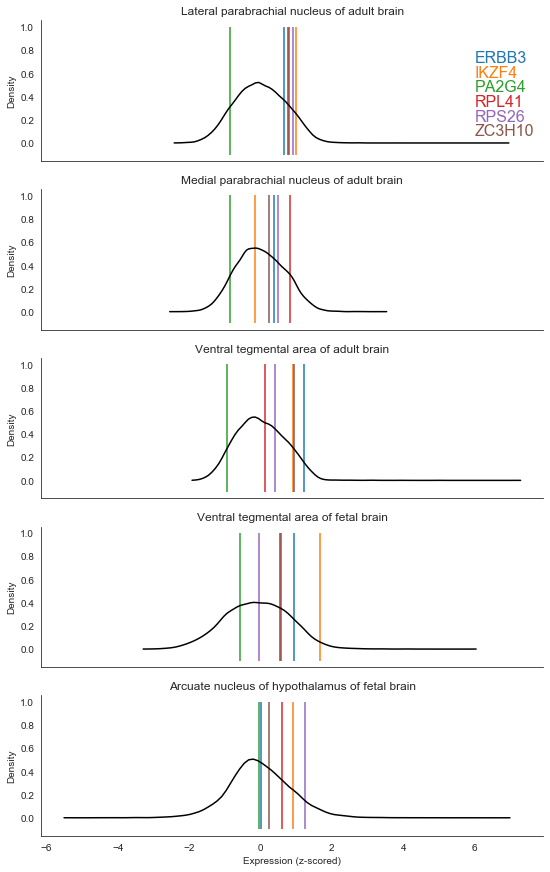

In [33]:
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(5, 1, sharey=True, sharex=True, figsize=(9,15))
plotting.make_dist_plot(adult_exp, 'lateral parabrachial nucleus', duncan, gene_text=True, ax=ax1)
plotting.make_dist_plot(adult_exp, 'medial parabrachial nucleus', duncan, gene_text=False, ax=ax2)
plotting.make_dist_plot(adult_exp, 'ventral tegmental area', duncan, gene_text=False, ax=ax3)
plotting.make_dist_plot(fetal_exp, 'ventral tegmental area', duncan, gene_text=False, ax=ax4)
plotting.make_dist_plot(fetal_exp, 'arcuate nucleus of hypothalamus', duncan, gene_text=False, ax=ax5)

ax1.set_title('Lateral parabrachial nucleus of adult brain')
ax2.set_title('Medial parabrachial nucleus of adult brain')
ax3.set_title('Ventral tegmental area of adult brain')
ax4.set_title('Ventral tegmental area of fetal brain')
ax5.set_title('Arcuate nucleus of hypothalamus of fetal brain')
ax5.set_xlabel('Expression (z-scored)')
fig.tight_layout()
#plt.savefig('./figures/fig6-density_plots.pdf', dpi=300, bbox_inches='tight')

# Results with Lutter gene lists
## Adult human data

In [34]:
results_lutterAN_adult = hba.generate_stats_table(adult_exp, gene_list=lutterAN)

You submitted a gene list with 51 genes.
    51 of those genes are present in the reference dataset.
    Genes not found in our reference data: []


In [35]:
results_lutterAN_adult.loc[brain_areas, :]

,AUROC,p,pFDR,rank
lateral parabrachial nucleus,0.580136,0.047708,0.593068,9.0
medial parabrachial nucleus,0.576974,0.057192,0.593068,14.0
paraventricular nucleus of the hypothalamus,0.524248,0.549105,0.830265,77.0
arcuate nucleus of the hypothalamus,0.487144,0.750763,0.916722,133.0
raphe nuclei of medulla,0.533397,0.409280,0.784478,66.0
pontine raphe nucleus,0.554102,0.181308,0.593068,41.0
subcallosal cingulate gyrus,0.470767,0.470123,0.790352,170.0
nucleus accumbens,0.579041,0.050829,0.593068,10.0
ventral tegmental area,0.569608,0.085458,0.593068,17.0
bed nucleus of stria terminalis,0.601267,0.012347,0.593068,3.0


In [37]:
results_lutterBN_adult = hba.generate_stats_table(adult_exp, gene_list=lutterBN)

You submitted a gene list with 80 genes.
    80 of those genes are present in the reference dataset.
    Genes not found in our reference data: []


In [38]:
results_lutterBN_adult.loc[brain_areas, :]

,AUROC,p,pFDR,rank
lateral parabrachial nucleus,0.456652,0.180089,0.611085,195.0
medial parabrachial nucleus,0.423790,0.018439,0.577450,230.0
paraventricular nucleus of the hypothalamus,0.467504,0.314945,0.669195,174.0
arcuate nucleus of the hypothalamus,0.482017,0.578141,0.808004,149.0
raphe nuclei of medulla,0.452275,0.139991,0.584880,200.0
pontine raphe nucleus,0.483489,0.609642,0.826589,148.0
subcallosal cingulate gyrus,0.501235,0.969550,0.990592,119.0
nucleus accumbens,0.426941,0.023868,0.577450,227.0
ventral tegmental area,0.475317,0.445289,0.769607,163.0
bed nucleus of stria terminalis,0.441367,0.069811,0.577450,219.0


## Fetal human data

In [39]:
results_lutterAN_fetal = hba.generate_stats_table(fetal_exp, gene_list=lutterAN)

You submitted a gene list with 51 genes.
    51 of those genes are present in the reference dataset.
    Genes not found in our reference data: []


In [40]:
results_lutterAN_fetal.loc[fetal_brain_areas, :]

,AUROC,p,pFDR,rank
lateral parabrachial nucleus,0.565766,0.104182,0.987354,27.0
medial parabrachial nucleus,0.533699,0.405066,0.987354,109.0
paraventricular nucleus of hypothalamus,0.522146,0.584269,0.987354,153.0
arcuate nucleus of hypothalamus,0.511004,0.785713,0.992928,213.0
dorsal raphe nucleus,0.556313,0.164117,0.987354,43.0
raphe magnus nucleus,0.547250,0.243033,0.987354,67.0
raphe obscurus nucleus,0.522844,0.572479,0.987354,148.0
subgenual_cingulate_cortex,0.452176,0.237360,0.987354,465.0
core of nucleus accumbens,0.552371,0.195677,0.987354,51.0
ventral tegmental area,0.538522,0.341208,0.987354,95.0


In [41]:
results_lutterBN_fetal = hba.generate_stats_table(fetal_exp, gene_list=lutterBN)

You submitted a gene list with 80 genes.
    80 of those genes are present in the reference dataset.
    Genes not found in our reference data: []


In [42]:
results_lutterAN_fetal.loc[fetal_brain_areas, :]

,AUROC,p,pFDR,rank
lateral parabrachial nucleus,0.565766,0.104182,0.987354,27.0
medial parabrachial nucleus,0.533699,0.405066,0.987354,109.0
paraventricular nucleus of hypothalamus,0.522146,0.584269,0.987354,153.0
arcuate nucleus of hypothalamus,0.511004,0.785713,0.992928,213.0
dorsal raphe nucleus,0.556313,0.164117,0.987354,43.0
raphe magnus nucleus,0.547250,0.243033,0.987354,67.0
raphe obscurus nucleus,0.522844,0.572479,0.987354,148.0
subgenual_cingulate_cortex,0.452176,0.237360,0.987354,465.0
core of nucleus accumbens,0.552371,0.195677,0.987354,51.0
ventral tegmental area,0.538522,0.341208,0.987354,95.0


# SVG mapping

In [43]:
from IPython.display import SVG

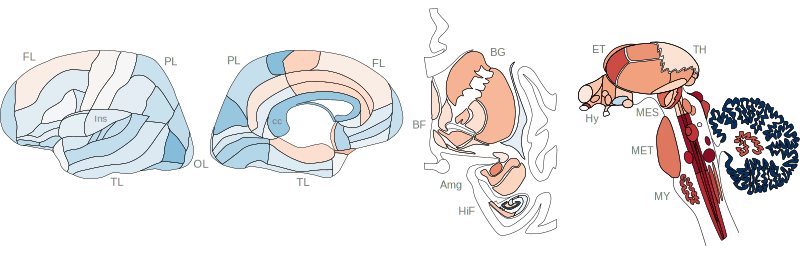

In [44]:
SVG(filename='./figures/human_diagram.svg')

# Supplemental
Tables with expression levels of disease gene lists in the areas of interest

In [45]:
#union of gene_lists
genelist_union = pd.concat([negraes, watson_coding, duncan, lutterAN])

In [46]:
duplicated = genelist_union[genelist_union.duplicated()]

In [47]:
duplicated

32          AMT
16        GIPC3
19        IFIT3
38      SCGB1A1
44    TNFRSF10A
Name: 0, dtype: object

### Duplicated genes across gene lists
- AMT (in Negraes/Watson coding)
https://www.genecards.org/cgi-bin/carddisp.pl?gene=AMT
- TNFRSF10A (Negraes and Lutter)
http://www.genecards.org/cgi-bin/carddisp.pl?gene=TNFRSF10A
- SCGB1A1 (Negraes and Lutter)
http://www.genecards.org/cgi-bin/carddisp.pl?gene=SCGB1A1
- IFIT3 (Negraes and Lutter)
http://www.genecards.org/cgi-bin/carddisp.pl?gene=IFIT3
- GIPC3 (Negraes and Lutter)
http://www.genecards.org/cgi-bin/carddisp.pl?gene=GIPC3

In [48]:
genelist_union = genelist_union.drop_duplicates()

In [49]:
genelist_union.shape

(519,)

In [50]:
def generate_supp_table(gene_list):
    supp_table_adult = adult_exp.loc[adult_exp.index.isin(gene_list), brain_areas]
    supp_table_fetal = fetal_exp.loc[fetal_exp.index.isin(gene_list), fetal_brain_areas]
    supp_table = pd.concat([supp_table_adult, supp_table_fetal.add_prefix('fetal_')], axis=1)
    
    return supp_table

In [51]:
supp_table_lists_union = generate_supp_table(genelist_union)

In [52]:
supp_table_lists_union.insert(0, 'Negraes et al. Table S5', supp_table_lists_union.index.isin(negraes))
supp_table_lists_union.insert(1, 'Watson et al. protein coding Table S6', supp_table_lists_union.index.isin(watson_coding))
supp_table_lists_union.insert(2, 'Duncan et al. rs4622308', supp_table_lists_union.index.isin(duncan))
supp_table_lists_union.insert(3, 'Lutter et al. Table S3.RestrictedEating', supp_table_lists_union.index.isin(lutterAN))
supp_table_lists_union.insert(4, 'Lutter et al. Table S4.BingeEating', supp_table_lists_union.index.isin(lutterBN))


In [53]:
supp_table_lists_union

,Negraes et al. Table S5,Watson et al. protein coding Table S6,Duncan et al. rs4622308,Lutter et al. Table S3.RestrictedEating,Lutter et al. Table S4.BingeEating,lateral parabrachial nucleus,medial parabrachial nucleus,paraventricular nucleus of the hypothalamus,arcuate nucleus of the hypothalamus,raphe nuclei of medulla,...,fetal_arcuate nucleus of hypothalamus,fetal_dorsal raphe nucleus,fetal_raphe magnus nucleus,fetal_raphe obscurus nucleus,fetal_subgenual_cingulate_cortex,fetal_core of nucleus accumbens,fetal_ventral tegmental area,fetal_bed nucleus of stria terminalis,fetal_central_amygdala,fetal_solitary nucleus
gene_symbol,,,,,,,,,,,,,,,,,,,,,
ABCA12,True,False,False,False,False,-0.559354,-0.712071,-0.594848,-0.172974,-0.682818,...,-0.071422,0.000910,-0.498300,-0.662835,0.946788,0.223315,0.901787,-0.307584,-1.182149,-0.871649
ABCC6P2,True,False,False,False,False,-0.612350,1.020678,0.920739,0.857978,0.330344,...,-0.832635,-0.405025,-0.736371,-1.526651,-0.027777,0.174622,0.107702,-0.102345,-1.540131,-1.575547
ACTG1,False,False,False,True,False,-0.410066,-1.046665,0.169894,-0.666537,0.461756,...,-0.013390,0.634428,0.119645,-0.615935,-0.531451,1.025118,0.126828,0.255389,0.206124,0.075387
ACYP2,False,True,False,False,False,0.787990,0.518638,0.435496,-0.285587,0.852885,...,0.916150,1.632514,1.600224,1.487197,0.447047,0.036608,0.783924,0.168733,0.313144,0.966486
ADAM20,True,False,False,False,False,0.154131,1.043086,0.197874,-0.705747,0.311954,...,-0.695882,-0.841844,-1.960607,-1.985197,0.157226,0.261494,-1.111818,-0.443833,1.047889,0.830027
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZNF589,False,True,False,False,False,-0.449572,-0.624372,-0.906556,-0.194309,-0.971752,...,-1.513900,-1.008418,-0.062754,-1.370383,0.654766,0.069444,-1.047053,-0.416086,-0.454460,-0.197103
ZNF596,True,False,False,False,False,-0.472164,-0.300559,-0.113749,0.239661,-0.569624,...,1.020297,-0.227560,-1.426584,-0.936864,0.743878,-0.059895,-1.280994,0.287349,0.307728,-0.284733
ZNF716,False,False,False,True,False,0.861883,0.118554,-0.238531,-1.798348,-0.212845,...,-0.617640,-0.774815,-1.404310,-0.414257,0.331522,-0.075734,-0.918150,0.721085,-2.186585,-1.581105


In [54]:
#supp_table_lists_union.to_csv('./results/supp_expression_table.csv')